In [1]:
import os
from tqdm import tqdm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc,logfbank
import librosa

In [2]:
df = pd.read_csv("instruments.csv")

In [3]:
df.head()

,fname,label
0,5388d14d.wav,Saxophone
1,c685f05f.wav,Saxophone
2,36d20ab5.wav,Saxophone
3,d6665734.wav,Saxophone
4,7352e28f.wav,Saxophone


In [4]:
df.set_index('fname', inplace=True)


In [5]:
df.head()

,label
fname,
5388d14d.wav,Saxophone
c685f05f.wav,Saxophone
36d20ab5.wav,Saxophone
d6665734.wav,Saxophone
7352e28f.wav,Saxophone


In [6]:
df.index

Index(['5388d14d.wav', 'c685f05f.wav', '36d20ab5.wav', 'd6665734.wav',
       '7352e28f.wav', '8fa096bf.wav', '2f9c5f62.wav', '9cd05a2b.wav',
       'ab465bf9.wav', 'c40632d7.wav',
       ...
       'e43f7db2.wav', '3c66098d.wav', 'ad42e493.wav', '740e5bb7.wav',
       '800b401e.wav', '3c713bcf.wav', '2fc00271.wav', 'b0c06255.wav',
       '71c6451f.wav', '5de123c3.wav'],
      dtype='object', name='fname', length=300)

In [7]:
for f in df.index:
    rate, signal = wavfile.read('wavfiles/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate


In [8]:
classes = list(np.unique(df.label))

In [9]:
classes

['Acoustic_guitar',
 'Bass_drum',
 'Cello',
 'Clarinet',
 'Double_bass',
 'Flute',
 'Hi-hat',
 'Saxophone',
 'Snare_drum',
 'Violin_or_fiddle']

In [10]:
class_dist = df.groupby(['label'])['length'].mean()

In [11]:
class_dist

label
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi-hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64

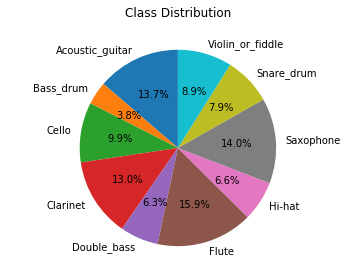

In [12]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [13]:

for c in classes:
    wav_file = df[df.label == c].iloc[0,0]
    signal,rate = librosa.load('wavfiles/'+f,sr = 44100) ##

In [14]:
wav_file

'Violin_or_fiddle'